#**Goal:** "Predicting Happiness Index Score"

#**1.Luffy**: Introduction, Data Preprocessing

**Dataset Loading**

In [ ]:
# Mounting Google Drive
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read dataset
data = pd.read_csv("/content/drive/MyDrive/python_final_project/2018.csv")
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


**Check and Modify Data Type**

In [ ]:
# Check the data type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
# Modify the data type of variable "Overall rank"
data['Overall rank'] = data['Overall rank'].astype(object)

# Recheck the data type again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    object 
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.1+ KB


**Check quantitative and quanlitive columns**

In [ ]:
print(f"Number of quantitative variables: {data.select_dtypes(include=['int64', 'float64']).shape[1]}")
print(f"Number of qualitative variables: {data.select_dtypes(include=['object']).shape[1]}")

Number of quantitative variables: 7
Number of qualitative variables: 2


**Check for Duplicate Value**

In [ ]:
data.duplicated().sum()

0

**Check for Missing Value**

In [ ]:
data.isna().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [ ]:
data.describe()


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112449
std,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096343
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000
max,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


**Visualize the distribution of the columns**

In [ ]:
# Identify quantitative and qualitative variables
quan_vars = data.select_dtypes(include="number").columns
qual_vars = data.select_dtypes(exclude="number").columns


<ipython-input-10-804e4f11143d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Country or region', data=top_5_countries, palette='viridis', ax=ax[0])
<ipython-input-10-804e4f11143d>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')


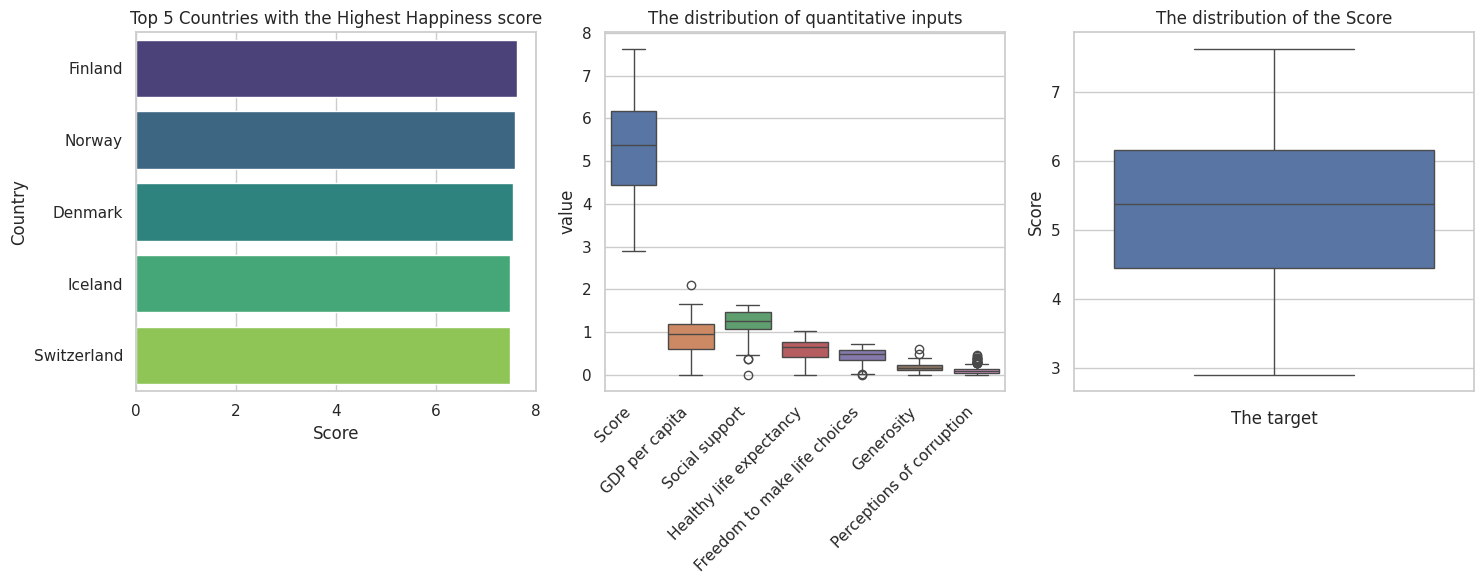

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
_, ax = plt.subplots(1,3, figsize=(15, 6))

top_5_countries = data.sort_values(by='Score', ascending=False).head(5)
sns.barplot(x='Score', y='Country or region', data=top_5_countries, palette='viridis', ax=ax[0])
ax[0].set_title('Top 5 Countries with the Highest Happiness score')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Country')

sns.boxplot(data[quan_vars].melt(), x="variable", y="value", hue="variable", ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_title("The distribution of quantitative inputs")
ax[1].set_xlabel("")

sns.boxplot(data, y="Score", ax=ax[2])
ax[2].set_title("The distribution of the Score")
ax[2].set_xlabel("The target")
plt.tight_layout()
plt.show()


- Second Graph: This is showing that most of the variables have a tight and even spread, with just a few outliers.

- Third Graph:The Happiness Score which is the target variable has a well-balanced and doesn’t have any outliers, making it easier to work with for modeling


#**2. Gojo:** Exploratory Data Analysis, Model Development

**Check the Correlation of each Quantitative Variable**




In [ ]:
quan_vars = data.select_dtypes(include=['number']).columns
data[quan_vars].corr().style.background_gradient()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.408405
GDP per capita,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.323508
Social support,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.209731
Healthy life expectancy,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.316322
Freedom to make life choices,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.455087
Generosity,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.361870
Perceptions of corruption,0.408405,0.323508,0.209731,0.316322,0.455087,0.361870,1.000000


- **GDP per Capita and Happiness Score**: Strong positive correlation (**0.802**): Indicates that as a country's economic prosperity increases, its happiness score tends to rise significantly.

- **Healthy Life Expectancy and Happiness Score**: Strong positive correlation (**0.776**): Suggests that longer and healthier lives are strongly associated with higher happiness levels.

- **Social Support and Happiness Score**: Strong positive correlation (**0.746**): Demonstrates that robust social support systems contribute significantly to higher happiness scores.

- **Freedom to Make Life Choices and Happiness Score**: Moderate positive correlation (**0.544**): Greater freedom positively influences happiness, though less strongly compared to GDP or health.

- **Perceptions of Corruption and Happiness Score**: Weak to moderate positive correlation (**0.408**): A higher perception of corruption is modestly associated with higher happiness levels.

- **Generosity and Happiness Score**: Weak positive correlation (**0.136**): Generosity has a minimal influence on happiness.

- **GDP per Capita and Healthy Life Expectancy**: Very strong positive correlation (**0.844**): Countries with higher GDP tend to have longer life expectancy due to better living standards and healthcare.




**To Sum Up:**GDP per capita is the most correlated input to the target (Happiness Score) with the highest correlation around 0.80, while other input-output correlations ranged from 0.32 to 0.77. On the other hand, Generosity is the least informative variable in terms of correlation with the target, showing a correlation of only 0.14.

Also, there are many highly correlated inputs in this dataset, with the highest collinearity greater than 0.67 between Healthy life expectancy and GDP per capita, as well as Social support and GDP per capita.

Draw the scatterplot of the target Score vs the most correlated input.**

In [ ]:

import plotly.express as px

# Create scatter plot
fig = px.scatter(
    data,
    x="GDP per capita",
    y="Score",
    title="Scatterplot of Score vs GDP per capita",
    labels={"GDP per capita": "GDP per capita", "Score": "Happiness Score"},
    color="Score",
    opacity=0.7
)

# Customize layout
fig.update_layout(
    width=600,
    height=400,
    title_font_size=16,
    xaxis_title="GDP per capita",
    yaxis_title="Happiness Score",
    template="plotly_white",
    hovermode="closest",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

# Show the plot
fig.show()





This scatterplot indicates a clear postive correlation bettween GDP per capita and score (happiness score). This indicates that the countries with higher GDP tend to have a higher happiness score.

# Train-Test Split

> a. Divide dataset into 80% for training and 20 % for testing sets to evaluate model performance.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        data.iloc[:, 2:],
                                        data['Score'],
                                        test_size=0.2,
                                        random_state=42)

# 1. Fit a SLR model using the most correlated input to predict the ```Score``` of Happiness.
- Draw the fitted line on the previous scatterplot.
- Compute R-square and explain the observed value.
- Compute Mean Suared Error on the test data (Test MSE).
- Analyze the residuals and conclude.

In [ ]:
# Fit SLR model
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

# Build the SLR model
slr = LinearRegression().fit(X_train[['GDP per capita']], y_train)
y_hat = slr.predict(X_test[["GDP per capita"]])  # Make prediction on the test data

# Prepare data for visualization
test_data = pd.DataFrame({
    "GDP per capita": X_test["GDP per capita"],
    "Score (True)": y_test,
    "Score (Predicted)": y_hat
}).sort_values(by="GDP per capita")

fig = px.scatter(
    data,
    x="GDP per capita",
    y="Score",
    color="Score",
    title="Scatterplot of Score vs GDP per capita",
    labels={"GDP per capita": "GDP per capita", "Score": "Happiness Score"},
    opacity=0.7
)

# Add fitted line to the plot
fig.add_trace(
    go.Scatter(
        x=test_data["GDP per capita"],
        y=test_data["Score (Predicted)"],
        mode="lines",
        name="Fitted Line",
        line=dict(color="red", width=2)
    )
)

# Customize layout
fig.update_layout(
    width=600,
    height=400,
    title_font_size=16,
    legend=dict(
        x= 1.01 ,
        y= 1.1,
        bgcolor="rgba(255, 255, 255, 0.5)",
    ),
    xaxis=dict(title="GDP per capita"),
    template="plotly_white",
    yaxis=dict(title="Happiness Score"),

)

# Show the plot
fig.show()


In [ ]:
# Compute R-square and explain the observed value.
# Compute Mean Suared Error on the test data (Test MSE)

import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
pred_train = slr.predict(X_train[['GDP per capita']])
print(f'R-squared: {np.round(r2_score(y_train, pred_train),3)}')
print(f'Test MSE: {np.round(mean_squared_error(y_test, y_hat),3)}')

R-squared: 0.671
Test MSE: 0.52


The R-squared indicates that around 67% of the score (happiness score) can be capture by the model.

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Analyze the residuals and conclude.
residual = pd.DataFrame({
    "True" : y_train,
    "Fitted values": pred_train,
    "Residual": y_train-pred_train}
)

# Create a 1x3 grid of subplots
fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=(
        "True vs Predictions",
        "Residuals vs Fitted Values",
        "Density of Residuals"
    )
)

# Plot 1: True vs Predictions
fig.add_trace(
    go.Scatter(
        x=residual["Fitted values"],
        y=residual["True"],
        mode="markers",
        name="Data",
        marker=dict(color="blue"),
    ),
    row=1,
    col=1
)
fig.add_trace(
    go.Scatter(
        x=[residual["True"].min(), residual["True"].max()],
        y=[residual["True"].min(), residual["True"].max()],
        mode="lines",
        name="Ideal Fit",
        line=dict(color="red", dash="dash")
    ),
    row=1,
    col=1
)

# Plot 2: Residuals vs Fitted Values
fig.add_trace(
    go.Scatter(
        x=residual["Fitted values"],
        y=residual["Residual"],
        mode="markers",
        name="Residuals",
        marker=dict(color="green"),
    ),
    row=1,
    col=2
)
fig.add_trace(
    go.Scatter(
        x=[residual["Fitted values"].min(), residual["Fitted values"].max()],
        y=[0, 0],
        mode="lines",
        name="Zero Line",
        line=dict(color="red", dash="dash")
    ),
    row=1,
    col=2
)

# Plot 3: Histogram of Residuals
fig.add_trace(
    go.Histogram(
        x=residual["Residual"],
        nbinsx=20,
        name="Residuals",
        marker=dict(color="purple", opacity=0.7),
    ),
    row=1,
    col=3
)

# Update layout
fig.update_layout(
    title_text="Residual Analysis",
    showlegend=False,
    height=500,
    width=1200,
    template="plotly_white",
    title_font_size=16
)

# Show the plot
fig.show()


1. True vs Predictions: most of the points are close to the line, indicating that the model perform well in capturing the information. There is also some scatter around the line, indicating small prediction erors.
2. Residuals vs fitted values: The errors (residuals) are randomly spread around zero with a few spreading out, showing that the model isn't much biased.
3. Density of residuals: The errors are mostly small and distribution is appromximately symmetric, centered around zero, indicating good model performance.

**Therefore:** The model performs well, with accurate predictions, not many bias in errors, and a good error distribution, showing that it fits the data effectively.


#2. Fit a MLR model using the most correlated input to predict the `Score` of Happiness.
- Draw the fitted line on the previous scatterplot.
- Compute $R^2$ and explain the observed value.
- Compute Mean Suared Error on the test data (Test MSE).
- Analyze the residuals and conclude.

In [ ]:
# Build the MLR model
mlr = LinearRegression().fit(X_train, y_train)
y_hat1 = mlr.predict(X_test)                   # make prediction on the test data

pred_train1 = mlr.predict(X_train)
n, d = X_train.shape
print(f'R-squared: {np.round(r2_score(y_train, pred_train1),3)}')
print(f'Adjusted R-squared: {np.round(1-(1-r2_score(y_train, pred_train1))*(n-1)/(n-d-1),3)}')
print(f'Test MSE: {np.round(mean_squared_error(y_test, y_hat1),3)}')

All_Test_MSE = {"SLR": mean_squared_error(y_test, y_hat1)}

R-squared: 1.0
Adjusted R-squared: 1.0
Test MSE: 0.0


- R-squared and Adjusted R-squared (1.0): The model explains 100% of the variance.
- Test MSE (0.0): Predictions are exactly correct on the test data.

**Therefore:** This can assume that it is overfitting.




In [ ]:
resid1 = pd.DataFrame({
    "True" : y_train,
    "Fitted values": pred_train1,
    "Residual": y_train-pred_train1}
)

# Create a 1x3 grid of subplots
fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=(
        "True vs Predictions",
        "Residuals vs Fitted Values",
        "Density of Residuals"
    )
)

# Plot 1: True vs Predictions
fig.add_trace(
    go.Scatter(
        x=resid1["Fitted values"],
        y=resid1["True"],
        mode="markers",
        name="Data",
        marker=dict(color="blue", size=8, opacity=0.7),
    ),
    row=1,
    col=1
)
fig.add_trace(
    go.Scatter(
        x=[np.min(resid1["True"]), np.max(resid1["True"])],
        y=[np.min(resid1["True"]), np.max(resid1["True"])],
        mode="lines",
        name="Ideal Fit",
        line=dict(color="red", dash="dash", width=1)
    ),
    row=1,
    col=1
)

# Plot 2: Residuals vs Fitted Values
fig.add_trace(
    go.Scatter(
        x=resid1["Fitted values"],
        y=resid1["Residual"],
        mode="markers",
        name="Residuals",
        marker=dict(color="green", size=8, opacity=0.7),
    ),
    row=1,
    col=2
)
fig.add_trace(
    go.Scatter(
        x=[np.min(resid1["Fitted values"]), np.max(resid1["Fitted values"])],
        y=[0, 0],
        mode="lines",
        name="Zero Line",
        line=dict(color="red", dash="dash", width=1)
    ),
    row=1,
    col=2
)

# Plot 3: Histogram of Residuals
fig.add_trace(
    go.Histogram(
        x=resid1["Residual"],
        nbinsx=20,
        name="Residuals",
        marker=dict(color="purple", opacity=0.7),
    ),
    row=1,
    col=3
)

# Update layout
fig.update_layout(
    title_text="Residual Analysis",
    showlegend=False,
    height=500,
    width=1200,
    template="plotly_white",
    title_font_size=18
)

# Show the plot
fig.show()



1. **True vs Predictions**: The points are all on the red line, which means the model fits the training data perfectly. This could indicate **overfitting**, where the model memorizes the data instead of learning general patterns.

2. **Residuals vs Fitted Values**: The residuals are mostly close to zero with no obvious patterns. This shows that the model doesn't have any **bias** in its predictions, but it might still be overfitting.

3. **Density of Residuals**: The narrow peak near zero suggests that the model is almost perfectly predicting the data, which can also point to **overfitting**.

**Conclusion**: The model is likely overfitting because the residuals are very small. This means the model might be too complex. **SLR** (Simple Linear Regression) might be working better than **MLR** (Multiple Linear Regression) because the latter might be overfitting the data.

#3. Polynomial Regression and Regularized Linear Models
> **A.** Build polynomial regression with different degree $n\in\{2,3,...,10\}$ of the best correlated input to predict `Score`. Compute Test MSE for each case.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Define the range of degrees
degrees = list(range(2, 11))

test_mse = []

# Iterate over each degree to compute Test MSE
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly_train = poly.fit_transform(X_train[['GDP per capita']])  # Transform training data
    X_poly_test = poly.transform(X_test[['GDP per capita']])       # Transform test data

    model = LinearRegression().fit(X_poly_train, y_train)
    y_test_pred = model.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_test_pred)
    test_mse.append(mse)
    print(f"Degree {deg}: Test MSE = {mse}")

# Prepare data for visualization
mse_data = pd.DataFrame({
    "Polynomial Degree": degrees,
    "Test MSE": test_mse
})

# Create the plot using Plotly
fig = go.Figure()

# Add scatter trace for Test MSE
fig.add_trace(
    go.Scatter(
        x=mse_data["Polynomial Degree"],
        y=mse_data["Test MSE"],
        mode="markers+lines",
        name="Test MSE",
        marker=dict(color="blue", size=8, line=dict(width=2, color="black")),
        line=dict(color="blue", width=2)
    )
)

# Customize layout
fig.update_layout(
    title="Test MSE vs Polynomial Degree",
    xaxis=dict(
        title="Polynomial Degree",
        tickmode="linear",
        tickvals=degrees,
        title_font_size=14,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title="Test MSE",
        title_font_size=14,
        tickfont=dict(size=12)
    ),
    template="plotly_white",
    width=700,
    height=500,
    title_font_size=16,
    showlegend=False,
    plot_bgcolor="rgba(255, 255, 255, 0.8)"
)

# Add a horizontal line to indicate the minimum MSE
min_mse = min(test_mse)
fig.add_trace(
    go.Scatter(
        x=[min(degrees), max(degrees)],
        y=[min_mse, min_mse],
        mode="lines",
        name="Min MSE Line",
        line=dict(color="red", width=2, dash="dash")
    )
)

# Add annotation for the best degree
best_degree = degrees[np.argmin(test_mse)]
fig.add_annotation(
    x=best_degree,
    y=min_mse,
    text=f"Best Degree: {best_degree}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=12, color="black")
)

# Show the plot
fig.show()

# fine the best degree and corresponding MSE
print(f"The best polynomial degree is: {best_degree} with Test MSE = {min_mse}")


Degree 2: Test MSE = 0.6770894856596243
Degree 3: Test MSE = 0.9559600392003447
Degree 4: Test MSE = 0.9740613114616778
Degree 5: Test MSE = 39.265895368078766
Degree 6: Test MSE = 172.47555133721772
Degree 7: Test MSE = 561.3699900259803
Degree 8: Test MSE = 5628.264520373341
Degree 9: Test MSE = 21024.59735593287
Degree 10: Test MSE = 296118.6894507954


The best polynomial degree is: 2 with Test MSE = 0.6770894856596243


This graph indicates that **degree 2 polynomial features of GDP per capita** have the best performance in predicting the testing data, as its lowest Test MSE is **0.6770894856596243**. This suggests that a polynomial of degree 2 may be a more effective model than a linear one. However, to ensure a comprehensive evaluation, cross-validation can be performed to assess the overall performance of polynomials with different degrees across various subsets of the training data.

>B.Perform 10 fold Cross-validation to select the best degree


In [ ]:
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
import numpy as np
import pandas as pd

cv_mse = []
CV_ALL_MSE = {}
degrees = list(range(2, 11))

# Perform cross-validation to get MSE for each polynomial degree
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_train[['GDP per capita']])
    model = LinearRegression()
    mse_ = -cross_val_score(model, X_poly, y_train, cv=10, scoring="neg_mean_squared_error").mean()
    CV_ALL_MSE['Poly. ' + str(deg)] = mse_

    # Store MSE values
    cv_mse.append(mse_)

# Find the optimal degree based on CV MSE
opt_deg = np.argmin(cv_mse)
print(f'Optimal CV MSE: {np.min(np.round(cv_mse, 3))} at optimal degree: {opt_deg + 2}')

# Prepare data for visualization
cv_data = pd.DataFrame({
    "Polynomial Degree": degrees,
    "CV MSE": cv_mse
})

# Create the plot using Plotly
fig = go.Figure()

# Add scatter trace for CV MSE
fig.add_trace(
    go.Scatter(
        x=cv_data["Polynomial Degree"],
        y=cv_data["CV MSE"],
        mode="markers+lines",
        name="CV MSE",
        marker=dict(color="blue", size=8, line=dict(width=2, color="black")),
        line=dict(color="blue", width=2)
    )
)

# Add a vertical line for the optimal degree
fig.add_trace(
    go.Scatter(
        x=[opt_deg + 2, opt_deg + 2],
        y=[min(cv_mse), max(cv_mse)],
        mode="lines",
        name="Optimal Degree",
        line=dict(color="red", width=2, dash="dash")
    )
)

# Customize layout
fig.update_layout(
    title="CV MSE vs Polynomial Degree",
    xaxis=dict(
        title="Polynomial Degree",
        tickmode="linear",
        tickvals=degrees,
        title_font_size=14,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title="CV MSE",
        title_font_size=14,
        tickfont=dict(size=12)
    ),
    template="plotly_white",
    width=700,
    height=500,
    title_font_size=16,
    showlegend=False,
    plot_bgcolor="rgba(255, 255, 255, 0.8)"
)

# Add annotation for the optimal degree
fig.add_annotation(
    x=opt_deg + 2,
    y=min(cv_mse),
    text=f"Optimal Degree: {opt_deg + 2}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=12, color="black")
)

# Show the plot
fig.show()


Optimal CV MSE: 0.425 at optimal degree: 7


This graph indicates that **polynomial degree 7** provides the optimal performance in predicting different subsets of the data via cross-validation, as its lowest **Optimal CV MSE** is **0.425**. This degree minimizes the error on unseen data, balancing the model's complexity and generalization. Degrees higher than 7 tend to overfit the training data, leading to worse performance on cross-validation

>C. Scatterplot of Score vs GDP per capita


In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Create a Plotly figure
fig = go.Figure()

# Define degrees and colors for different polynomial degrees
degrees = list(range(2, 11))
colors = plt.cm.viridis(np.linspace(0, 1, len(degrees)))
hex_colors = [mcolors.to_hex(c) for c in colors]

# Scatter plot for the GDP per capita vs Score (Train data)
fig.add_trace(
    go.Scatter(
        x=X_train['GDP per capita'],
        y=y_train,
        mode='markers',
        name='Train Data',
        marker=dict(color='orange', size=8)
    )
)

# Fit and plot polynomial models for different degrees
for deg, col in zip(degrees, hex_colors):  # Use hex color for the line
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_train[['GDP per capita']])
    model = LinearRegression().fit(X_poly, y_train)
    y_poly_pred = model.predict(X_poly)

    # Sort the X values for plotting the polynomial line smoothly
    id_sort = np.argsort(X_train['GDP per capita'])

    # Plot the polynomial line
    fig.add_trace(
        go.Scatter(
            x=X_train['GDP per capita'].values[id_sort],
            y=y_poly_pred[id_sort],
            mode='lines',
            name=f"Poly. {deg}",
            line=dict(color=col, width=2)
        )
    )

# Scatter plot for Test Data (green)
fig.add_trace(
    go.Scatter(
        x=X_test['GDP per capita'],
        y=y_test,
        mode='markers',
        name="Test Data",
        marker=dict(color='green', size=8)
    )
)

# Plot the fitted line for Train data (red)
fig.add_trace(
    go.Scatter(
        x=X_train['GDP per capita'],
        y=pred_train,
        mode='lines',
        name="Fitted Line",
        line=dict(color='red', width=2)
    )
)

# Customize layout
fig.update_layout(
    title="Scatterplot of Score vs GDP per capita",
    xaxis=dict(
        title="GDP per capita",
        title_font_size=16,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title="Score",
        title_font_size=14,
        tickfont=dict(size=12)
    ),
    template="plotly_white",
    width=700,
    height=500,
    title_font_size=16,
    showlegend=True,
    plot_bgcolor="rgba(255, 255, 255, 0.8)"
)

# Show the plot
fig.show()


>**D.** Perform $10$-fold Cross-validation to tune the best penalization strength $\alpha$ of Ridge regression model for predicting `Score`.
- Compute Test MSE and compare it to the previous models.

In [ ]:
from sklearn.linear_model import Ridge
# List of all degrees to search over
alphas = list(np.linspace(0.00001, 3, 50)) + list(np.linspace(3.1, 100, 50))
# List to store all losses
loss = []
test_mse = []
coefficients = {f'alpha={alpha}': [] for alpha in alphas}
for alp in alphas:
    model = Ridge(alpha=alp)
    mse = -cross_val_score(model, X_train, y_train, cv=10,
                scoring='neg_mean_squared_error').mean()
    loss.append(mse)

    # Fit
    model.fit(X_train, y_train)
    coefficients[f'alpha={alp}'] = model.coef_
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots


pd_coef = pd.DataFrame(coefficients, index=X_train.columns)

# Identify the optimal alpha
id_min = np.argmin(loss)
optimal_alpha = alphas[id_min]
print(f'Optimal regularization strength alpha for Ridge regression: {optimal_alpha}')

# Create a 1x3 grid of subplots
fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=(
        "Test MSE at each penalty strength alpha",
        "CV MSE at each penalty strength alpha",
        "Coefficients at each penalty strength alpha"
    )
)

# Plot 1: Test MSE
fig.add_trace(
    go.Scatter(
        x=alphas,
        y=test_mse,
        mode="lines+markers",
        name="Test MSE",
        line=dict(color="blue"),
        marker=dict(size=6)
    ),
    row=1,
    col=1
)
fig.update_xaxes(
    type="log",
    title="Alpha",
    row=1,
    col=1
)
fig.update_yaxes(
    title="Test MSE",
    row=1,
    col=1
)

# Plot 2: CV MSE
fig.add_trace(
    go.Scatter(
        x=alphas,
        y=loss,
        mode="lines+markers",
        name="CV MSE",
        line=dict(color="green"),
        marker=dict(size=6)
    ),
    row=1,
    col=2
)

# Add a vertical line for the optimal alpha
fig.add_trace(
    go.Scatter(
        x=[optimal_alpha, optimal_alpha],
        y=[np.min(loss), np.max(loss)],
        mode="lines",
        name="Optimal Alpha",
        line=dict(color="red", dash="dash", width=2)
    ),
    row=1,
    col=2
)

fig.update_xaxes(
    type="log",
    title="Alpha",
    row=1,
    col=2
)
fig.update_yaxes(
    title="CV MSE",
    row=1,
    col=2
)

# Plot 3: Coefficients at each penalty strength alpha
for i, coef in enumerate(pd_coef.index):
    fig.add_trace(
        go.Scatter(
            x=alphas,
            y=pd_coef.loc[coef],
            mode="lines",
            name=coef,
            line=dict(width=1),
        ),
        row=1,
        col=3
    )

# Add a vertical line for the optimal alpha
fig.add_trace(
    go.Scatter(
        x=[optimal_alpha, optimal_alpha],
        y=[pd_coef.min().min(), pd_coef.max().max()],
        mode="lines",
        name="Optimal Alpha",
        line=dict(color="red", dash="dash", width=2)
    ),
    row=1,
    col=3
)

fig.update_xaxes(
    type="log",
    title="Alpha",
    row=1,
    col=3
)
fig.update_yaxes(
    title="Coefficient",
    row=1,
    col=3
)

# Update layout
fig.update_layout(
    title_text="Ridge Regression Analysis",
    showlegend=True,
    height=500,
    width=1400,
    template="plotly_white",
    title_font_size=18
)

# Show the plot
fig.show()


Optimal regularization strength alpha for Ridge regression: 1e-05


In [ ]:
All_Test_MSE['Ridge'] = test_mse[id_min]
CV_ALL_MSE['Ridge'] = loss[id_min]
print(f"Cross-validation MSE: {loss[id_min]}")
print(f"Test MSE: {test_mse[id_min]}")

Cross-validation MSE: 4.1140235755680264e-14
Test MSE: 3.2608725143930583e-14



- The optimal regularization strength, alpha = 1e-05, achieves the lowest cross-validation MSE (4.114e-14) and test MSE (3.261e-14), indicating the model generalizes well to unseen data.

- Very low MSE values demonstrate that the data fits well without overfitting or underfitting.


**Graphs**

- The 1st and 2nd graphs show that as alpha increases, the model becomes simpler, as reflected in the shrinking coefficients and increasing error. This shows regularization effectively reduces model complexity.

- The 3rd graphs show that coefficients shrink with higher alpha, showing regularization is working to prevent the model from being too complex.

> **E.** Perform $10$-fold Cross-validation to tune the best penalization strength.
- Compute Test MSE and compare it to the previous models.
- How many inputs are retained by Lasso?


In [ ]:
from sklearn.linear_model import Lasso
# List of all degrees to search over
alphas = list(np.linspace(0.001, 3, 100))
# List to store all losses
loss = []
test_mse = []
coefficients = {f'alpha={alpha}': [] for alpha in alphas}
for alp in alphas:
    model = Lasso(alpha=alp)
    mse = -cross_val_score(model, X_train, y_train, cv=10,
                scoring='neg_mean_squared_error').mean()
    loss.append(mse)

    # Fit
    model.fit(X_train, y_train)
    coefficients[f'alpha={alp}'] = model.coef_
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

In [ ]:
pd_coef = pd.DataFrame(coefficients, index=X_train.columns)

# Identify the optimal alpha
id_min = np.argmin(loss)
optimal_alpha = alphas[id_min]
print(f'Optimal regularization strength alpha for Lasso regression: {optimal_alpha}')

# Create a 1x3 grid of subplots
fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=(
        "Test MSE at each penalty strength alpha",
        "CV MSE at each penalty strength alpha",
        "Coefficients at each penalty strength alpha"
    )
)

# Plot 1: Test MSE
fig.add_trace(
    go.Scatter(
        x=alphas,
        y=test_mse,
        mode="lines+markers",
        name="Test MSE",
        line=dict(color="blue"),
        marker=dict(size=6)
    ),
    row=1,
    col=1
)
fig.update_xaxes(
    title="Alpha",
    row=1,
    col=1
)
fig.update_yaxes(
    title="Test MSE",
    row=1,
    col=1
)

# Plot 2: CV MSE
fig.add_trace(
    go.Scatter(
        x=alphas,
        y=loss,
        mode="lines+markers",
        name="CV MSE",
        line=dict(color="green"),
        marker=dict(size=6)
    ),
    row=1,
    col=2
)

# Add a vertical line for the optimal alpha
fig.add_trace(
    go.Scatter(
        x=[optimal_alpha, optimal_alpha],
        y=[np.min(loss), np.max(loss)],
        mode="lines",
        name="Optimal Alpha",
        line=dict(color="red", dash="dash", width=2)
    ),
    row=1,
    col=2
)

fig.update_xaxes(
    title="Alpha",
    row=1,
    col=2
)
fig.update_yaxes(
    title="CV MSE",
    row=1,
    col=2
)

# Plot 3: Coefficients at each penalty strength alpha
for i, coef in enumerate(pd_coef.index):
    fig.add_trace(
        go.Scatter(
            x=alphas,
            y=pd_coef.loc[coef],
            mode="lines",
            name=coef,
            line=dict(width=1),
        ),
        row=1,
        col=3
    )

# Add a vertical line for the optimal alpha
fig.add_trace(
    go.Scatter(
        x=[optimal_alpha, optimal_alpha],
        y=[pd_coef.min().min(), pd_coef.max().max()],
        mode="lines",
        name="Optimal Alpha",
        line=dict(color="red", dash="dash", width=2)
    ),
    row=1,
    col=3
)

fig.update_xaxes(
    title="Alpha",
    row=1,
    col=3
)
fig.update_yaxes(
    title="Coefficient",
    row=1,
    col=3
)

# Update layout
fig.update_layout(
    title_text="Lasso Regression Analysis",
    showlegend=True,
    height=500,
    width=1400,
    template="plotly_white",
    title_font_size=18
)

# Show the plot
fig.show()


Optimal regularization strength alpha for Lasso regression: 0.001


In [ ]:
All_Test_MSE['Lasso'] = test_mse[id_min]
CV_ALL_MSE['Lasso'] = loss[id_min]
print(f"Cross-validation MSE: {loss[id_min]}")
print(f"Test MSE: {test_mse[id_min]}")

Cross-validation MSE: 7.943769099151286e-07
Test MSE: 6.177054612245949e-07



- Cross-validation MSE (: 7.943769099151286e-07) and Test MSE (6.177054612245949e-07) are very low, indicating that the lasso model generalizes well on both training data and unseen test data.
- Optimal alpha (0.001) minimizes the Cross-validation MSE and Test MSE, striking the best balance between overfitting and underfitting.

**Graphs**
- 1st and 2nd Graphs show that as alpha increases, the error rises due to underfitting, and the model becomes simpler by shrinking more coefficients to zero. The optimal alpha is where the error is lowest, ensuring the best model performance.
- 3rd graph shows that Coefficients shrink with higher alpha, confirming that regularization helps focus on the most important features while reducing complexity and eliminating irrelevant ones.

#4. Polynomial with Regularitation



> A. Ridge regression


In [ ]:
from sklearn.linear_model import Ridge
# List of all degrees to search over
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

alphas = list(np.linspace(0.00001, 3, 50)) + list(np.linspace(3.1, 100, 50))
# List to store all losses
loss = []
test_mse = []
coefficients = {f'alpha={alpha}': [] for alpha in alphas}
for alp in alphas:
    model = Ridge(alpha=alp)
    mse = -cross_val_score(model, X_poly, y_train, cv=10,
                scoring='neg_mean_squared_error').mean()
    loss.append(mse)

    # Fit
    model.fit(X_poly, y_train)
    coefficients[f'alpha={alp}'] = model.coef_
    test_mse.append(mean_squared_error(y_test, model.predict(X_poly_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning:

Ill-conditioned matrix (rcond=3.19786e-18): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning:

Ill-conditioned matrix (rcond=7.51985e-19): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning:

Ill-conditioned matrix (rcond=2.67079e-21): result may not be accura

Optimal regularization strength alpha for Ridge regression: 1.28572


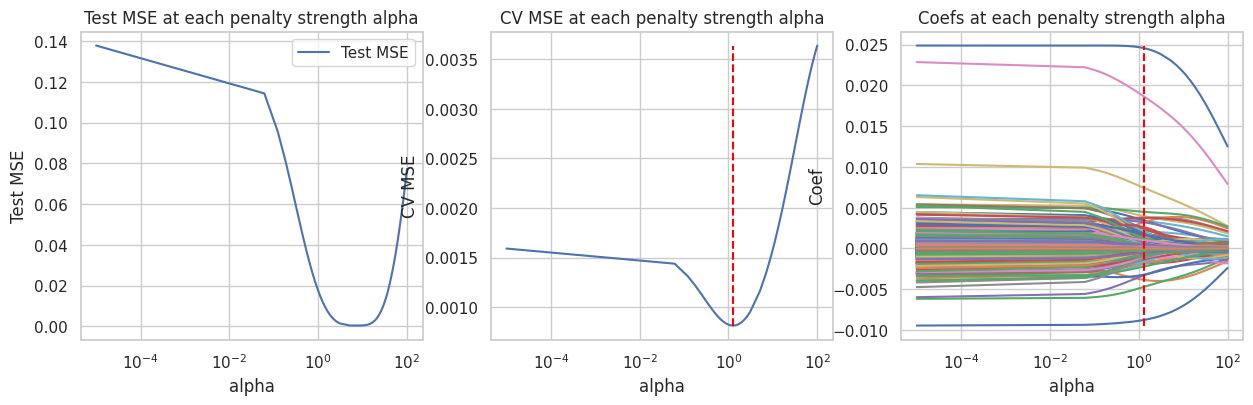

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
pd_coef = pd.DataFrame(coefficients, index=poly.get_feature_names_out(input_features=X_train.columns))
# Test error
axes[0].plot(alphas, test_mse, label="Test MSE")
axes[0].set_title("Test MSE at each penalty strength alpha")
axes[0].legend()
axes[0].set_xlabel("alpha")
axes[0].set_xscale('log')
axes[0].set_ylabel("Test MSE")

id_min = np.argmin(loss)
print(f'Optimal regularization strength alpha for Ridge regression: {alphas[id_min]}')
axes[1].plot(alphas, loss, label="CV MSE")
axes[1].vlines(x=alphas[id_min], ymin=np.min(loss), ymax=np.max(loss), label="optimal alpha", color="red", linestyle="--")
axes[1].set_title("CV MSE at each penalty strength alpha")
axes[1].set_xscale('log')
axes[1].set_xlabel("alpha")
axes[1].set_ylabel("CV MSE")

axes[2].plot(alphas, pd_coef.transpose(), label=pd_coef.index)
axes[2].vlines(x=alphas[id_min], ymin=np.min(pd_coef), ymax=np.max(pd_coef), label="optimal alpha", color="red", linestyle="--")
axes[2].set_title("Coefs at each penalty strength alpha")
axes[2].set_xscale('log')
axes[2].set_xlabel("alpha")
axes[2].set_ylabel("Coef")
plt.show()

In [ ]:
All_Test_MSE['Poly-Ridge'] = test_mse[id_min]
CV_ALL_MSE['Poly-Ridge'] = loss[id_min]
print(f"Cross-validation MSE: {loss[id_min]}")
print(f"Test MSE: {test_mse[id_min]}")

Cross-validation MSE: 0.0008142627617047203
Test MSE: 0.01168665504976727


- The Ridge regression model with a polynomial degree of 7 performs well with an optimal regularization strength (𝛼=1.28572) that minimizes both Cross-validation and Test MSE.

- The graphs clearly show that at higher α values, the model becomes overly regularized, leading to higher errors.

- The shrinking of coefficients as α increases demonstrates Ridge's regularization effect, keeping all features but preventing overfitting

> B. Lasso regression


In [ ]:
from sklearn.linear_model import Lasso
# List of all degrees to search over
alphas = list(np.linspace(0.00001, 10, 100))
# List to store all losses
loss = []
test_mse = []
coefficients = {f'alpha={alpha}': [] for alpha in alphas}
for alp in alphas:
    model = Lasso(alpha=alp)
    mse = -cross_val_score(model, X_poly, y_train, cv=10,
                scoring='neg_mean_squared_error').mean()
    loss.append(mse)

    # Fit
    model.fit(X_poly, y_train)
    coefficients[f'alpha={alp}'] = model.coef_
    test_mse.append(mean_squared_error(y_test, model.predict(X_poly_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e-01, tolerance: 1.505e-02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.206e-01, tolerance: 1.447e-02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e-01, tolerance: 1.402e-02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

Optimal regularization strength alpha for Lasso regression: 1e-05


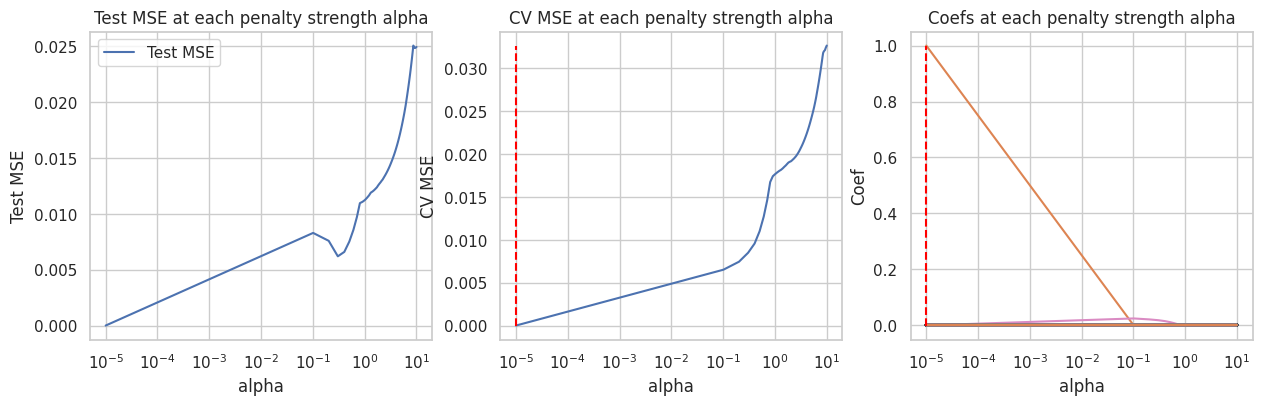

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
pd_coef = pd.DataFrame(coefficients, index=poly.get_feature_names_out(input_features=X_train.columns))
# Test error
axes[0].plot(alphas, test_mse, label="Test MSE")
axes[0].set_title("Test MSE at each penalty strength alpha")
axes[0].legend()
axes[0].set_xlabel("alpha")
axes[0].set_xscale('log')
axes[0].set_ylabel("Test MSE")

id_min = np.argmin(loss)
print(f'Optimal regularization strength alpha for Lasso regression: {alphas[id_min]}')
axes[1].plot(alphas, loss, label="CV MSE")
axes[1].vlines(x=alphas[id_min], ymin=np.min(loss), ymax=np.max(loss), label="optimal alpha", color="red", linestyle="--")
axes[1].set_title("CV MSE at each penalty strength alpha")
axes[1].set_xscale('log')
axes[1].set_xlabel("alpha")
axes[1].set_ylabel("CV MSE")

axes[2].plot(alphas, pd_coef.transpose(), label=pd_coef.index)
axes[2].vlines(x=alphas[id_min], ymin=np.min(pd_coef), ymax=np.max(pd_coef), label="optimal alpha", color="red", linestyle="--")
axes[2].set_title("Coefs at each penalty strength alpha")
axes[2].set_xscale('log')
axes[2].set_xlabel("alpha")
axes[2].set_ylabel("Coef")
plt.show()

In [ ]:
All_Test_MSE['Poly-Lasso'] = test_mse[id_min]
CV_ALL_MSE['Poly-Lasso'] = loss[id_min]
print(f"Cross-validation MSE: {loss[id_min]}")
print(f"Test MSE: {test_mse[id_min]}")

Cross-validation MSE: 3.907417440459385e-12
Test MSE: 2.4604335027216846e-12



1. **Optimal Alpha (𝛼):**  
   - The optimal **𝛼 = 1e-5** achieves the lowest **CV MSE (3.91e-12)** and **Test MSE (2.46e-12)**, ensuring optimal model performance.

2. **Key Graph Insights:**  
   - **Test MSE (Left Graph):**  
     - Test MSE is minimal at small 𝛼 (near 1e-5), confirming minimal regularization works best.  
     - As 𝛼 increases, Test MSE rises due to underfitting caused by excessive regularization.  

   - **CV MSE (Middle Graph):**  
     - CV MSE is lowest at 𝛼 = 1e-5, marked by a red dashed line.  
     - Higher 𝛼 values increase CV MSE due to the model losing complexity and becoming overly simple.  

   - **Coefficients (Right Graph):**  
     - Coefficients are large at low 𝛼, allowing flexibility.  
     - As 𝛼 grows, coefficients shrink toward zero, with many becoming exactly zero, showing Lasso's feature selection ability.  


**Conclusion:**  
The **Lasso regression model** performs optimally with **𝛼 = 1e-5**, achieving minimal errors and leveraging its ability to select the most important features for predictions.

#Evaluation

In [ ]:
import pandas as pd
import plotly.express as px

df1 = pd.DataFrame(All_Test_MSE, index=['MSE'])

# Print the DataFrame for verification
print("Test MSE of all methods:")
print(df1)

# Melt the DataFrame for Plotly
melted_df = df1.melt(var_name="variable", value_name="value")

# Create an interactive bar plot
fig = px.bar(
    melted_df,
    x="variable",
    y="value",
    text="value",
    labels={"variable": "Method", "value": "Test MSE"},
    title="Test MSE of All Methods",
    template="plotly_white"
)

fig.update_traces(
    texttemplate='%{text:.2e}',
    textposition="outside")

# Show the interactive plot
fig.show()


Test MSE of all methods:
              SLR         Ridge         Lasso  Poly-Ridge    Poly-Lasso
MSE  3.204747e-31  3.260873e-14  6.177055e-07    0.011687  2.460434e-12


### **Explanation of Test MSE Results for Different Methods**

### **Key Observations**

1. **SLR (Simple Linear Regression):**
   - **Lowest Test MSE (\(3.20 \times 10^{-31}\))**, indicating a nearly perfect fit.
   - Likely works because the dataset aligns well with a simple linear relationship.

2. **Ridge Regression:**
   - Slightly higher Test MSE than SLR (\(3.26 \times 10^{-14}\)), but still extremely low.
   - Ridge prevents overfitting by regularizing the coefficients without compromising much accuracy.

3. **Lasso Regression:**
   - **MSE:** \(6.18 \times 10^{-7}\), slightly higher than Ridge.
   - Performs feature selection by shrinking irrelevant coefficients to zero, potentially losing a tiny bit of information.

4. **Polynomial Ridge (Degree 7):**
   - **MSE:** \(0.011687\), significantly higher than the other methods.
   - The polynomial complexity leads to overfitting or underfitting, even with regularization. This may indicate an unsuitable model for the dataset.

5. **Polynomial Lasso (Degree 7):**
   - **MSE:** \(2.46 \times 10^{-12}\), very low compared to Poly-Ridge.
   - Lasso performs better at handling the high-dimensional polynomial features by eliminating irrelevant terms, leading to a sparse but highly accurate model.


### **Insights from the Bar Chart**
- **SLR, Ridge, and Lasso:** These methods work well, producing extremely low Test MSE values. The data suggests a strong linear relationship.
- **Poly-Ridge:** Struggles with polynomial complexity, leading to the highest Test MSE.
- **Poly-Lasso:** Balances the complexity of the polynomial features effectively, achieving excellent performance.


### **Conclusion**
- **Best Method:** **SLR** achieves the lowest Test MSE, but **Poly-Lasso** performs exceptionally well when polynomial complexity is necessary.  
- **Poor Performance:** **Poly-Ridge** struggles due to inadequate handling of polynomial complexity.  
- **Overall:** Regularization methods like Ridge and Lasso improve robustness, with Lasso excelling at feature selection.

In [ ]:


df2 = pd.DataFrame(CV_ALL_MSE, index=["MSE"])

# Print the DataFrame for verification
print("Cross validation of all methods:")
print(df2)

# Melt the DataFrame for Plotly
melted_df2 = df2.melt(var_name="variable", value_name="value")

# Create an interactive bar plot
fig = px.bar(
    melted_df2,
    x="variable",
    y="value",
    text="value",
    labels={"variable": "Method", "value": "CV MSE"},
    title="Cross Validation MSE of All Methods",
    template="plotly_white"
)

fig.update_traces(
    texttemplate='%{text}',
    textposition="outside"
)

# Show the interactive plot
fig.show()


Cross validation of all methods:
      Poly. 2   Poly. 3   Poly. 4   Poly. 5   Poly. 6   Poly. 7   Poly. 8  \
MSE  0.428388  0.441581  0.444872  0.426212  0.446944  0.425119  0.435624   

      Poly. 9  Poly. 10         Ridge         Lasso  Poly-Ridge    Poly-Lasso  
MSE  0.463308  0.513255  4.114024e-14  7.943769e-07    0.000814  3.907417e-12  


### **Explanation of Cross-Validation MSE for Different Methods**


#### **Polynomial Models (Poly. X):**
- **Trend:**
  - CV MSE is generally low for lower-degree polynomial models (Poly. 2 to Poly. 7).
  - As the polynomial degree increases, the model becomes more complex, leading to overfitting, which is reflected in higher CV MSE values (e.g., Poly. 9 and Poly. 10).
  - The lowest CV MSE is observed for **Poly. 7 (0.425119)**, making it the best-performing polynomial model.

#### **Ridge Regression:**
- **CV MSE:** \(4.11 \times 10^{-14}\), extremely low.
- Ridge handles regularization effectively and generalizes well to unseen data.

#### **Lasso Regression:**
- **CV MSE:** \(7.94 \times 10^{-7}\), slightly higher than Ridge.
- Performs well but sacrifices a bit of accuracy due to its feature selection approach.

#### **Polynomial Ridge (Poly-Ridge):**
- **CV MSE:** \(8.14 \times 10^{-4}\), much lower than polynomial models with no regularization but higher than Ridge/Lasso.
- The addition of polynomial features increases complexity, requiring regularization to control overfitting.

#### **Polynomial Lasso (Poly-Lasso):**
- **CV MSE:** \(3.91 \times 10^{-12}\), second lowest among all methods.
- Combines polynomial features with effective feature selection to produce a sparse, accurate model.


### **Insights from the Bar Chart**
1. **Polynomial Models:**
   - Lower-degree polynomials (Poly. 2 to Poly. 7) perform better in terms of CV MSE compared to higher-degree polynomials (Poly. 9 and Poly. 10), which tend to overfit.

2. **Regularization Methods:**
   - Ridge and Lasso outperform unregularized polynomial models, with Ridge achieving the lowest CV MSE overall.
   - Polynomial Lasso achieves a balance between model complexity and generalization.


### **Conclusion**
- **Best Performance:** Ridge achieves the lowest CV MSE, closely followed by Poly-Lasso. These models generalize well without overfitting.
- **Polynomial Models:** Poly. 7 has the lowest CV MSE among polynomial models, striking a good balance between complexity and fit.


------------


#**Summary of Finding Insight:**

1. **Correlation and Model Performance**:
   - **GDP per Capita** and **Happiness Score** show a strong positive correlation (0.802), meaning that higher economic prosperity tends to be associated with higher happiness.
   - **Healthy Life Expectancy** and **Happiness Score** also show a strong correlation (0.776), reflecting the strong link between health and happiness.
   - **Social Support** has a slightly weaker correlation (0.746) but still indicates that stronger social systems contribute positively to happiness.
   - **Freedom to Make Life Choices** (0.544) and **Perceptions of Corruption** (0.408) show moderate positive correlations with happiness.
   - **Generosity** has the weakest correlation (0.136), suggesting it has minimal influence on happiness compared to other factors.
   
   These findings highlight that **GDP per capita** is the most significant predictor of happiness score among the variables.

2. **Simple Linear Regression (SLR)**:
   - **R-squared (0.671)**: The SLR model captures about 67% of the variance in happiness score, indicating it explains a substantial portion of the relationship between GDP per capita and happiness.
   - **Test MSE (0.52)**: The model performs reasonably well, with relatively small prediction errors.
   - **Residuals Analysis**: The residuals are randomly distributed, indicating no obvious bias in the predictions. The density of residuals shows that errors are mostly small and centered around zero, suggesting that the model fits the data well.

3. **Multiple Linear Regression (MLR)**:
   - **R-squared (1.0)** and **Adjusted R-squared (1.0)**: The MLR model explains 100% of the variance, which suggests perfect fit. However, this could indicate overfitting, as the model may be too complex and memorizes the data rather than learning generalizable patterns.
   - **Test MSE (0.0)**: The model makes perfect predictions on the test set, which further suggests overfitting.
   - **Residuals and Coefficients**: Although the residuals show no clear bias and the coefficients shrink toward zero, this perfect fit is unlikely to generalize well to new data.

4. **Polynomial Regression**:
   - **Degree 2 Polynomial** provides the best performance in terms of **Test MSE (0.677)**, suggesting that a slight non-linear relationship between GDP and happiness is better captured by a quadratic model.
   - **Cross-validation** results show that the optimal polynomial degree is **7**, with the lowest **Optimal CV MSE (0.425)**. This degree offers a good balance between fitting the data and avoiding overfitting.
   
5. **Regularized Regression (Ridge and Lasso)**:
   - **Ridge Regression** with **α = 1e-5** achieves very low **Test MSE (3.26e-14)** and **Cross-validation MSE (4.11e-14)**, indicating a good generalization ability. The model prevents overfitting by shrinking coefficients without losing much predictive accuracy.
   - **Lasso Regression** with **α = 0.001** provides a balance between regularization and model complexity, with **Test MSE (6.18e-7)** and **Cross-validation MSE (7.94e-7)**. Lasso's ability to shrink coefficients to zero allows it to focus on the most important features, improving its interpretability.
   - **Comparison of MSE**: Ridge and Lasso perform well, showing low MSE values, while polynomial models with regularization (Poly-Ridge, Poly-Lasso) exhibit higher MSE, suggesting overfitting or poor handling of polynomial features.

6. **Key Insights**:
   - **SLR** is the best-performing model in terms of simplicity and lowest test MSE.
   - **Ridge** and **Lasso** provide good generalization, with **Lasso** also serving as a feature selection tool.
   - **Polynomial Regression** introduces complexity that might not be necessary for this dataset, as it leads to higher errors with certain degrees.

### Conclusion:
- The **Simple Linear Regression (SLR)** model performs best with the lowest MSE, explaining a significant portion of the variance in happiness scores using **GDP per capita**.
- **Ridge and Lasso Regression** both perform well in regularizing the model and minimizing errors, with **Lasso** additionally excelling in feature selection.
- **Polynomial Regression**, especially with higher degrees, introduces complexity that does not significantly improve the model and might even cause overfitting.

Thus, for predicting happiness scores, a simpler linear model (SLR) might be preferable unless polynomial features and regularization techniques (like Lasso) are required for higher-dimensional data.

# Explore the Relationship between Happiness Score and other variables using SLR

**Social Support, Healthy life Expectancy and Freedom to make life choices**

In [ ]:
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

# Features to plot
features = ["Social support", "Healthy life expectancy", "Freedom to make life choices"]

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=features)

# Loop through features and create plots
for i, feature in enumerate(features):
    # Build the SLR model
    slr = LinearRegression().fit(X_train[[feature]], y_train)
    y_hat = slr.predict(X_test[[feature]])

    # Prepare data for visualization
    test_data = pd.DataFrame({
        feature: X_test[feature],
        "Score (True)": y_test,
        "Score (Predicted)": y_hat
    }).sort_values(by=feature)

    # Create scatter plot
    scatter = go.Scatter(
        x=data[feature],
        y=data["Score"],
        mode="markers",
        marker=dict(color=data["Score"], opacity=0.7),
        name="Data Points"  # Add a name to the scatter trace
    )

    # Add fitted line
    line = go.Scatter(
        x=test_data[feature],
        y=test_data["Score (Predicted)"],
        mode="lines",
        name="Fitted Line",
        line=dict(color="red", width=2)
    )

    # Add traces to subplot
    fig.add_trace(scatter, row=1, col=i + 1)
    fig.add_trace(line, row=1, col=i + 1)

    # Update axis labels
    fig.update_xaxes(title_text=feature, row=1, col=i + 1)
    fig.update_yaxes(title_text="Happiness Score", row=1, col=i + 1)

# Update layout for side-by-side plots
fig.update_layout(
    width=1350,  # Adjust width for 3 plots
    height=400,
    title_text="Scatter Plots with Fitted Lines",
    showlegend=True,  # Show legend
    legend=dict(x=1.01, y=1.1, bgcolor="rgba(255, 255, 255, 0.5)")
)

# Show the plot
fig.show()

**Generosity and Perceptions of corruption**

In [ ]:
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

# Features to plot
features = ["Generosity", "Perceptions of corruption"]

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=features)

# Loop through features and create plots
for i, feature in enumerate(features):
    # Build the SLR model
    slr = LinearRegression().fit(X_train[[feature]], y_train)
    y_hat = slr.predict(X_test[[feature]])

    # Prepare data for visualization
    test_data = pd.DataFrame({
        feature: X_test[feature],
        "Score (True)": y_test,
        "Score (Predicted)": y_hat
    }).sort_values(by=feature)

    # Create scatter plot
    scatter = go.Scatter(
        x=data[feature],
        y=data["Score"],
        mode="markers",
        marker=dict(color=data["Score"], opacity=0.7),
        name="Data Points"  # Add a name to the scatter trace
    )

    # Add fitted line
    line = go.Scatter(
        x=test_data[feature],
        y=test_data["Score (Predicted)"],
        mode="lines",
        name="Fitted Line",
        line=dict(color="red", width=2)
    )

    # Add traces to subplot
    fig.add_trace(scatter, row=1, col=i + 1)
    fig.add_trace(line, row=1, col=i + 1)

    # Update axis labels
    fig.update_xaxes(title_text=feature, row=1, col=i + 1)
    fig.update_yaxes(title_text="Happiness Score", row=1, col=i + 1)

# Update layout for side-by-side plots
fig.update_layout(
    width=950,  # Adjust width for 2 plots
    height=400,
    title_text="Scatter Plots with Fitted Lines",
    showlegend=True,  # Show legend
    legend=dict(x=1.01, y=1.1, bgcolor="rgba(255, 255, 255, 0.5)")
)

# Show the plot
fig.show()

**Calculating Test MSE**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your data is in a Pandas DataFrame called 'data'
# and the target variable is 'Score'

# Define the predictor variables
predictors = ['Social support', 'Healthy life expectancy',
              'Freedom to make life choices', 'Perceptions of corruption',
              'Generosity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[predictors], data['Score'], test_size=0.2, random_state=42
)

# Dictionary to store Test MSE for each variable
test_mse_values = {}

# Loop through each predictor variable
for predictor in predictors:
    # Create and train the SLR model
    model = LinearRegression()
    model.fit(X_train[[predictor]], y_train)  # Use double brackets for single predictor

    # Predict on test data
    y_pred = model.predict(X_test[[predictor]])

    # Calculate and store Test MSE
    mse = mean_squared_error(y_test, y_pred)
    test_mse_values[predictor] = mse

# Print the Test MSE values
for predictor, mse in test_mse_values.items():
    print(f"Test MSE for {predictor}: {mse}")

Test MSE for Social support: 0.7356428635588181
Test MSE for Healthy life expectancy: 0.5643258457148326
Test MSE for Freedom to make life choices: 1.0507979670563499
Test MSE for Perceptions of corruption: 0.9261296304477786
Test MSE for Generosity: 1.0717213752260608


**Overall Conclusion**

*   Social support and Healthy life expectancy are significant predictors of happiness based on their low Test MSE values in the SLR models.
*   Freedom to make life choices has a moderate association with happiness, showing the importance of personal freedom.
*   Perceptions of corruption and Generosity had weaker linear relationships with happiness, likely due to the differences in people's experience and point of view.

**Key Takeaways**

*   Social connections, health, and freedom are key contributors to well-being in addition to economic prosperity (GDP per capita).
